In [0]:
import numpy as np
import matplotlib.pyplot as plt



In [0]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)


In [6]:
print(train_data.shape)
print(test_data.shape)

(8982,)
(2246,)


In [7]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [8]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])


557056/550378 [==============================] - 1s 1us/step


In [9]:
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [10]:
train_labels[0]

3

In [0]:
def vectorize_sequences(sequences, dimension =10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [0]:
X_train = vectorize_sequences(train_data)
# Our vectorized test data
X_test = vectorize_sequences(test_data)


In [0]:
from keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)


In [0]:
from keras import layers, Sequential
from keras.layers import Dense

In [15]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape = (10000,)))

In [0]:
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

In [25]:
model.compile(optimizer='rmsprop', 
               loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [0]:
X_val = X_train[:1000]
x_train = X_train[1000:]
y_val = y_train[:1000]
y_train  = y_train[1000:] 

In [23]:
print(X_train.shape)
print(X_val.shape)
print(y_val.shape)
print(x_train.shape)
print(y_train.shape)

(8982, 10000)
(1000, 10000)
(1000, 46)
(7982, 10000)
(7982, 46)


In [26]:
history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(X_val,y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7982 samples, validate on 1000 samples
Epoch 1/20





7982/7982 [==============================] - 2s 248us/step - loss: 2.7962 - acc: 0.4763 - val_loss: 1.8882 - val_acc: 0.6560
Epoch 2/20
7982/7982 [==============================] - 1s 153us/step - loss: 1.5230 - acc: 0.6963 - val_loss: 1.3844 - val_acc: 0.7000
Epoch 3/20
7982/7982 [==============================] - 1s 151us/step - loss: 1.1314 - acc: 0.7580 - val_loss: 1.1994 - val_acc: 0.7320
Epoch 4/20
7982/7982 [==============================] - 1s 153us/step - loss: 0.9037 - acc: 0.8036 - val_loss: 1.0894 - val_acc: 0.7680
Epoch 5/20
7982/7982 [==============================] - 1s 153us/step - loss: 0.7277 - acc: 0.8416 - val_loss: 0.9990 - val_acc: 0.7910
Epoch 6/20
7982/7982 [==============================] - 1s 157us/step - loss: 0.5898 - acc: 0.8767 - val_loss: 0.9486 - val_acc: 0.8070
Epoch 7/20
7982/7982 [============

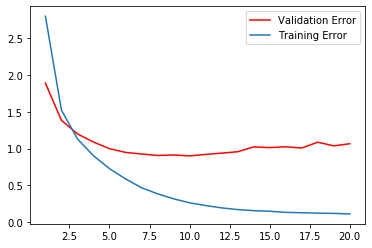

In [34]:
epochs = range(1, 21)
Training_error = history.history['loss']
Validation_error = history.history['val_loss']
plt.plot(epochs, Validation_error, color = 'red', label='Validation Error')
plt.plot(epochs, Training_error, label ='Training Error')
plt.legend()

In [36]:
model.evaluate(X_test, to_categorical(test_labels))

2246/2246 [==============================] - 0s 113us/step


[1.178842172809509, 0.7902938557966204]

In [0]:
model.evaluate?

In [0]:
predictions=model.predict(X_test)


In [43]:
predictions[10].shape

(46,)

In [44]:
np.sum(predictions[10])


1.0000001

In [45]:
np.argmax(predictions[10])



1